#Setting up Quandl, numpy, pandas and matplotlib
Note: quandl reduced the accessible Free data, which is why we I am using BTC-Daily data for this Chapter

In [114]:
import pandas
pandas.__version__

'2.2.3'

In [115]:
import os
def set_quandl_api_key(file_path):
    global QUANDL_API_KEY
    with open(file_path, 'r', encoding='utf-8') as file:
        QUANDL_API_KEY = file.read().strip()

# Example usage
file_path = os.path.join('/config', 'workspace', 'jamesma-pythonforfinance2nd', 'quandl_api.txt')
set_quandl_api_key(file_path)

# Now you can access the QUANDL_API_KEY variable globally
print("Successfully loaded API")

Successfully loaded API


In [116]:
#This section is for the Quandl API because it requires a Date string in the format 'YYYY-MM-DD' to pull data for a specific date range.
import datetime

# define range
start_date = datetime.date(2019, 1, 1)
end_date = datetime.date(2025, 3, 1)  # Gestern als Enddatum

# create comma seperated list of dates
date_list = []
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# create string
date_string = ','.join(date_list)

# check string
print(date_string)

2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01

#Fetching data from Quandl and Plotting it with matplotlib

In [117]:
import nasdaqdatalink as ndl

ndl.ApiConfig.api_key = QUANDL_API_KEY
df = ndl.get_table('QDL/BITFINEX',date=date_string, code='BTCUSD') #Free dataset
df = df.set_index('date')
df.sort_index(inplace=True)

print(df.head())


              code         high     low      mid    last     bid     ask  \
date                                                                       
2019-01-01  BTCUSD  3987.000000  3788.1  3957.75  3956.9  3957.7  3957.8   
2019-01-02  BTCUSD  4083.470676  3917.9  4061.15  4061.0  4061.1  4061.2   
2019-01-04  BTCUSD  3986.000000  3850.1  3959.75  3959.8  3959.7  3959.8   
2019-01-05  BTCUSD  4014.900000  3901.0  3910.95  3910.9  3910.9  3911.0   
2019-01-06  BTCUSD  4218.000000  3887.5  4172.95  4173.0  4172.9  4173.0   

                  volume  
date                      
2019-01-01  13315.082172  
2019-01-02  19372.512681  
2019-01-04  13222.270015  
2019-01-05  14581.231995  
2019-01-06  25114.016706  


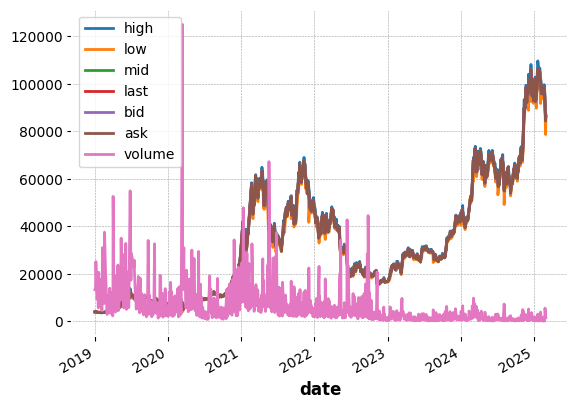

In [118]:
#%matplotlib inline    
import matplotlib.pyplot as plt    
df.plot();

#Plot the Mid-Price and the daily volume for BTC on BitFinex

In [119]:
prices = df['mid']  
volumes = df['volume']

print(prices.head())
print(volumes.head())

date
2019-01-01    3957.75
2019-01-02    4061.15
2019-01-04    3959.75
2019-01-05    3910.95
2019-01-06    4172.95
Name: mid, dtype: float64
date
2019-01-01    13315.082172
2019-01-02    19372.512681
2019-01-04    13222.270015
2019-01-05    14581.231995
2019-01-06    25114.016706
Name: volume, dtype: float64


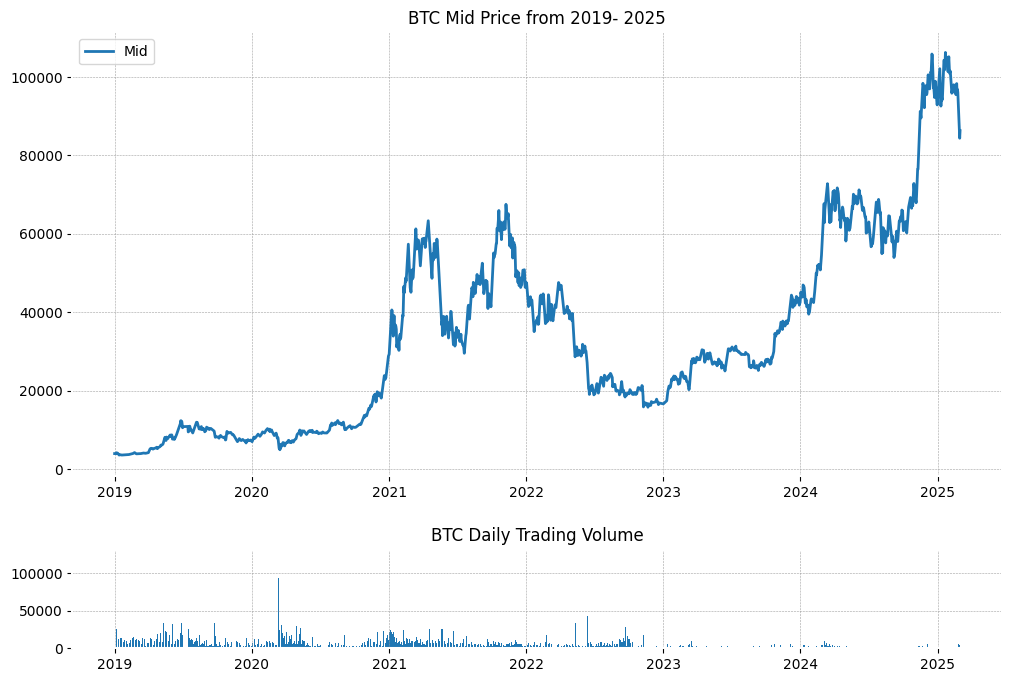

In [120]:
#The top plot consisting of daily closing prices    
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)    
top.plot(prices.index, prices, label='Mid')    
plt.title('BTC Mid Price from 2019- 2025')    
plt.legend(loc=2)    
# The bottom plot consisting of daily trading volume    
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)    
bottom.bar(volumes.index, volumes)    
plt.title('BTC Daily Trading Volume')    
plt.gcf().set_size_inches(12, 8)    
plt.subplots_adjust(hspace=0.75)


#Plotting a candlestick chart


In [121]:
import nasdaqdatalink as ndl 
import mplfinance as mpf  
import pandas as pd
import matplotlib.dates as mdates    
import matplotlib.pyplot as plt 
df['Open'] = df['last'].shift(1)
df_subset=df.tail(30)

#

/tmp/ipykernel_144375/2867415003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:, 'Date'] = pd.to_datetime(df_subset.index)


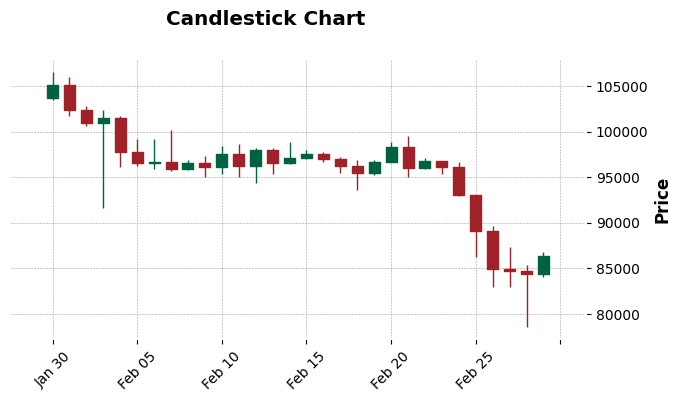

In [122]:
#%matplotlib inline  
df_subset.loc[:, 'Date'] = pd.to_datetime(df_subset.index)

df_ohlc = df_subset[['Open', 'high', 'low', 'last']].copy()  # Kopie erstellen, um das Original nicht zu verändern
df_ohlc.rename(columns={'last': 'Close', 'high': 'High', 'low': 'Low'}, inplace=True)  

mpf.plot(df_ohlc, type='candle', volume=False, style='charles', figsize=(8, 4),
         title="Candlestick Chart", ylabel='Price')



#Visualizing statistical properties of time series

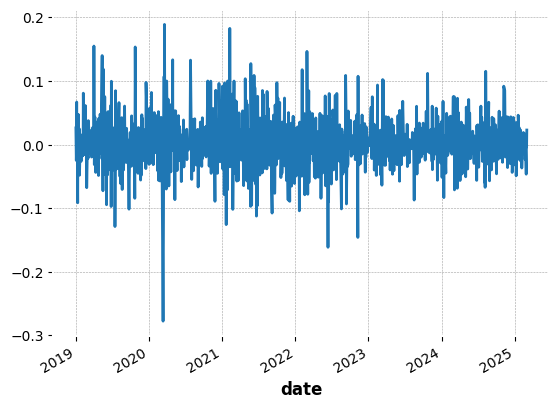

In [123]:
last_prices = df['last']
daily_changes = last_prices.pct_change(periods=1)
daily_changes.plot();

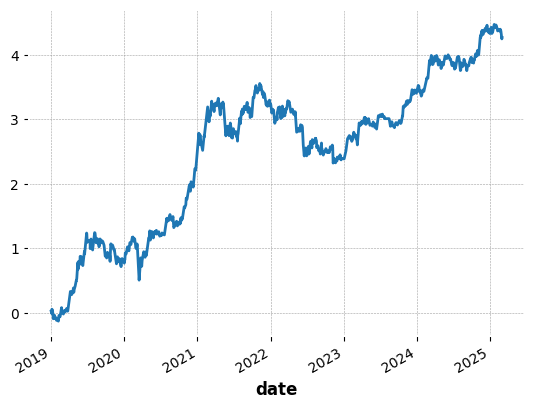

In [124]:
df_cumsum = daily_changes.cumsum()    
df_cumsum.plot();

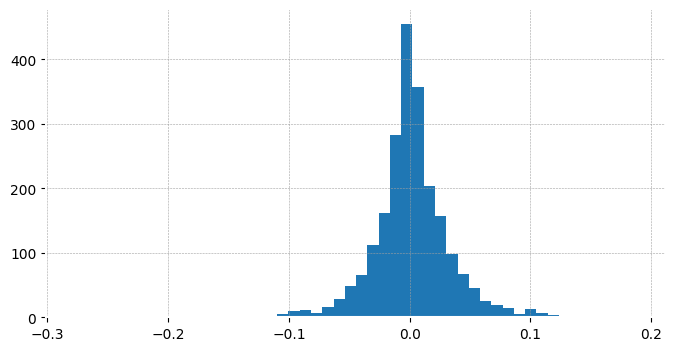

In [125]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [126]:
daily_changes.describe()

count    2231.000000
mean        0.001912
std         0.032543
min        -0.277700
25%        -0.012831
50%         0.000608
75%         0.016068
max         0.189082
Name: last, dtype: float64

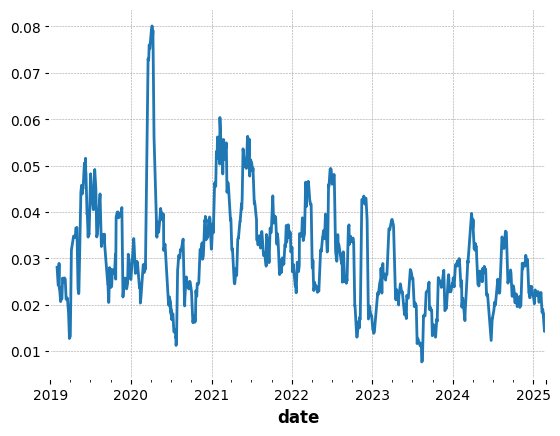

In [127]:
#Plotting Vola
df_filled = last_prices.asfreq('D', method='ffill')    
df_returns = df_filled.pct_change()    
df_std = df_returns.rolling(window=30, min_periods=30).std()    
df_std.plot();

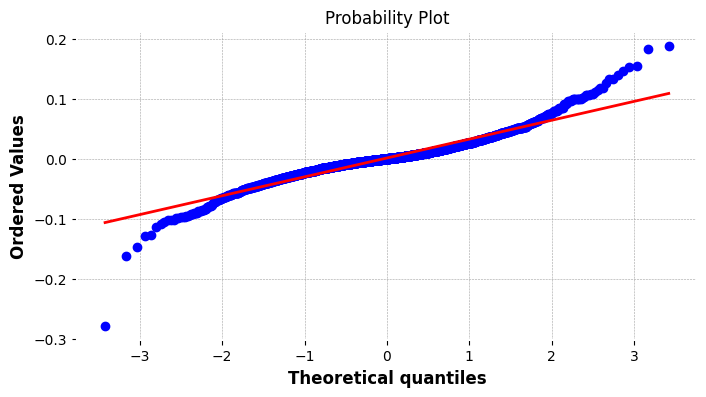

In [129]:
from scipy import stats    
from scipy.stats import probplot

daily_changes = last_prices.pct_change(periods=1).dropna()    

figure = plt.figure(figsize=(8,4))    
ax = figure.add_subplot(111)    
stats.probplot(daily_changes, dist='norm', plot=ax)    
plt.show();
